# KNN tutorial

## 초기 설정

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


### 데이터 로드

In [2]:
breast_cancer_data = load_breast_cancer()

In [3]:
# 데이터의 feature names
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
# 데이터의 target names (악성, 양성)
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

## 데이터 전처리

In [5]:
# 데이터 프레임으로 변환
X = pd.DataFrame(breast_cancer_data.data)
y = pd.DataFrame(breast_cancer_data.target)

In [6]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


### 정규화

In [8]:
# feature 사이의 값의 크기를 맞추기 위해 MinMax scaling
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


### 학습, 테스트 데이터 분리

In [9]:
# 학습 데이터(80%), 테스트 데이터(20%)로 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455, 1), (114, 1))

In [10]:
# 모델에 적합하도록 label shape 변경
y_train = y_train.values.reshape(-1)
y_test = y_test.values.reshape(-1)

y_train.shape, y_test.shape

((455,), (114,))

## 모델 생성

In [11]:
# 모델 생성 (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 모델 평가

In [12]:
from sklearn.metrics import accuracy_score, f1_score

# 모델을 사용한 예측(분류)
pred_test = knn.predict(X_test)

# 성능 출력
print(accuracy_score(y_test, pred_test))
print(f1_score(y_test, pred_test))

0.9210526315789473
0.9403973509933775


### k값 탐색

In [13]:
# k값을 3, 5, 7, ..., 51 까지 홀수 안에서 탐색

acc_values = []
f1_values = []
k_list = list(range(3, 52, 2))

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    pred_test = knn.predict(X_test)
    
    acc_values.append(accuracy_score(y_test, pred_test))
    f1_values.append(f1_score(y_test, pred_test))

In [14]:
print(f'max score based on accuracy: {np.round(max(acc_values), 3)}')
print(f'best k based on accuracy: {k_list[np.argmax(acc_values)]}')

print(f'max score based on f1-score: {np.round(max(f1_values), 3)}')
print(f'best k based on f1-score: {k_list[np.argmax(f1_values)]}')

max score based on accuracy: 0.93
best k based on accuracy: 7
max score based on f1-score: 0.947
best k based on f1-score: 13


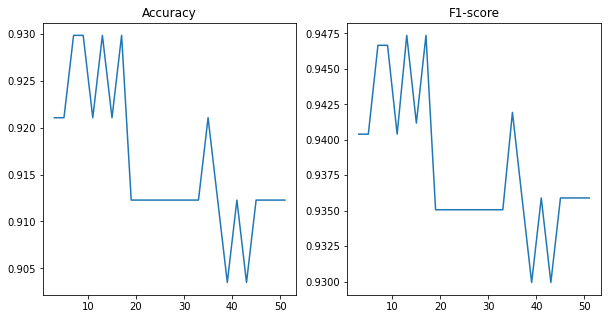

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(k_list, acc_values)
ax[0].set_title('Accuracy')
ax[1].plot(k_list, f1_values)
ax[1].set_title('F1-score')

plt.show()
